In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def MAE(y_true,y_pred):
    return round(mean_absolute_error(y_true,y_pred),2)

def W_SMAPE(y_true, y_pred):
    if not isinstance(y_true,np.ndarray):y_true = y_true.to_numpy()
    if not isinstance(y_pred,np.ndarray):y_pred = y_pred.to_numpy()
    smape = np.where(
        (y_true == 0) & (y_pred == 0), 
        0, 
        100 * np.abs((y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))
    )
    return np.round(np.mean(smape),2)

# Generated Data

In [2]:
def trend(time, slope, baseline):
    return slope * time + baseline

def seasonal_pattern(season_time):
    return np.where(season_time<0.4,
                    np.cos(season_time*2*np.pi),
                    1 / np.exp(3*season_time))

def seasonality(time, period, amplitude=1.5, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [3]:
# config
baseline = 50
amplitude = 20
slope = 0.09
noise_level = 10
seed = 42
time = np.arange((5 * 365 )+ 1, dtype = 'float32')
# data
trend_data = trend(time,slope,baseline)
season_data = seasonality(time, period=185, amplitude=amplitude)
noise_data = noise(time, noise_level=noise_level, seed=seed)
clean_data = trend_data+season_data
data = trend_data+season_data+noise_data
# df
ls_data = list(zip(trend_data,season_data,noise_data,clean_data,data))
df_data = pd.DataFrame(ls_data, columns=['trend_data','season_data','noise_data','actual','y'])
df_fulldata = df_data.copy()
df_fulldata['y1'] = df_data['y'].shift(-1)
df_fulldata['y2'] = df_data['y'].shift(-2)

df_fulldata['actual_y1'] = df_data['actual'].shift(-1)
df_fulldata['actual_y2'] = df_data['actual'].shift(-2)

# Lag
for i in list(range(15))+[30, 60, 180, 365]:
    df_fulldata[f'lag_{i}'] = df_data['y'].transform(lambda x: x.shift(i))
# Diff
for i in list(range(1,15))+[30, 60, 180, 365]:
    df_fulldata[f'diff_{i}'] = df_data['y'].transform(lambda x: x.diff(i))
    df_fulldata[f'diff_ma_{i}'] = df_fulldata[f'diff_{i}'] * 0.05
# MA
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    df_fulldata[f'ma_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).mean())
# Sum
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'sum_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).sum())
# Std
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'std_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).std())
# Max
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'max_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).max())

df_fulldata = df_fulldata.dropna(axis=0).reset_index(drop=True)
df_fulldata.shape

(1459, 93)

In [4]:
df_fulldata.to_csv("./src/generated_data.csv", index=False)
df_fulldata.tail()

,trend_data,season_data,noise_data,actual,y,y1,y2,actual_y1,actual_y2,lag_0,...,std_30,std_60,std_180,std_365,max_7,max_14,max_30,max_60,max_180,max_365
1454,213.710007,1.646143,-9.871795,215.356155,205.484360,214.107093,216.252131,215.419662,215.483612,205.484360,...,10.234402,9.878760,11.956702,15.319773,223.952768,231.046233,233.252065,234.53743,235.886682,235.886682
1455,213.800003,1.619664,-1.312570,215.419662,214.107093,216.252131,213.299429,215.483612,215.547989,214.107093,...,9.743560,9.622477,11.934167,15.213138,214.107093,231.046233,233.252065,234.53743,235.886682,235.886682
1456,213.889999,1.593611,0.768519,215.483612,216.252131,213.299429,209.112737,215.547989,215.612762,216.252131,...,9.758829,9.577354,11.940748,15.220453,216.252131,231.046233,233.252065,234.53743,235.886682,235.886682
1457,213.980011,1.567977,-2.248560,215.547989,213.299429,209.112737,217.364495,215.612762,215.677948,213.299429,...,9.760356,9.576760,11.911367,15.211557,216.252131,231.046233,233.252065,234.53743,235.886682,235.886682
1458,214.070007,1.542755,-6.500026,215.612762,209.112737,217.364495,220.162937,215.677948,215.743530,209.112737,...,9.651628,9.383285,11.902237,15.213019,216.252131,231.046233,233.252065,234.53743,235.886682,235.886682


# Plot

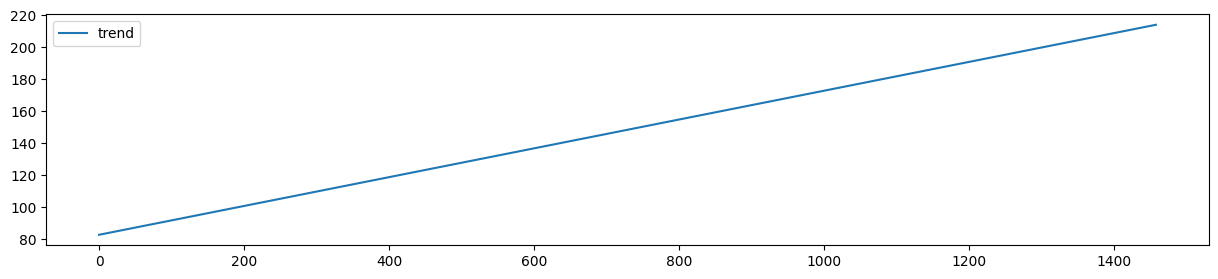

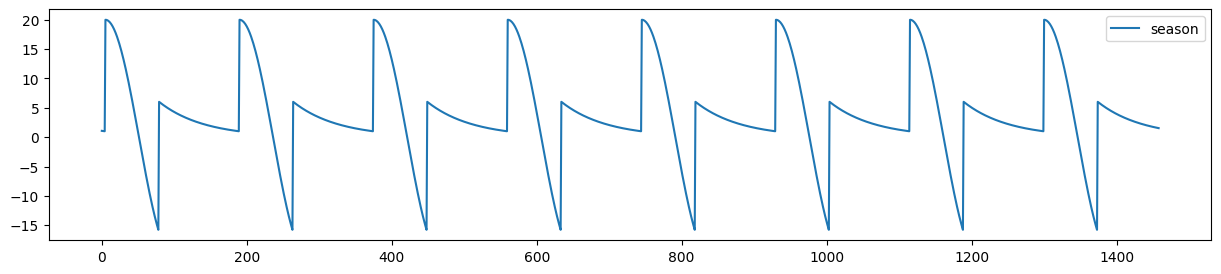

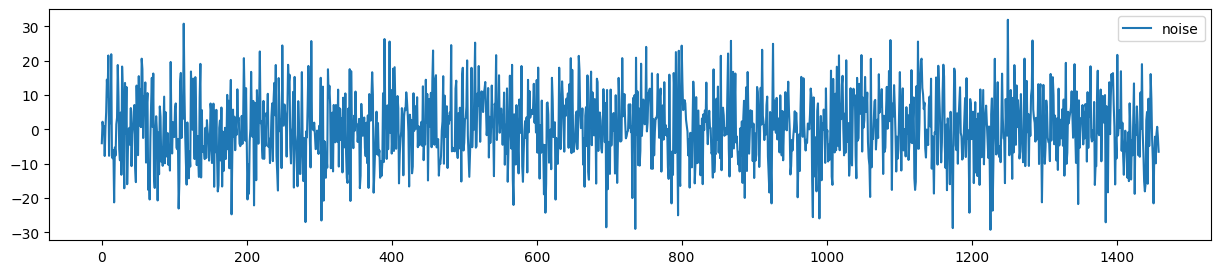

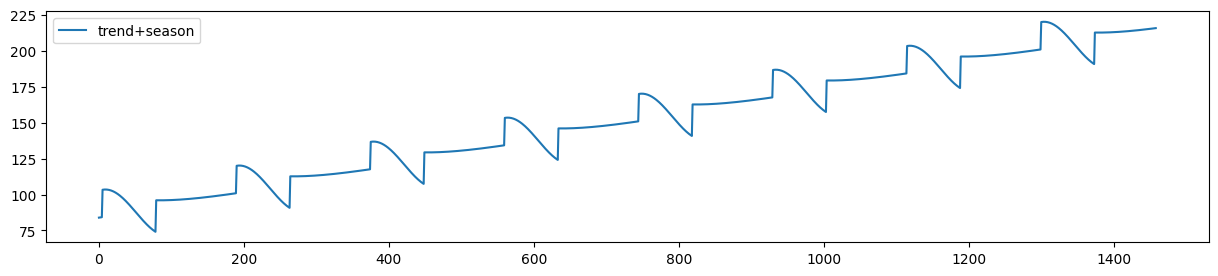

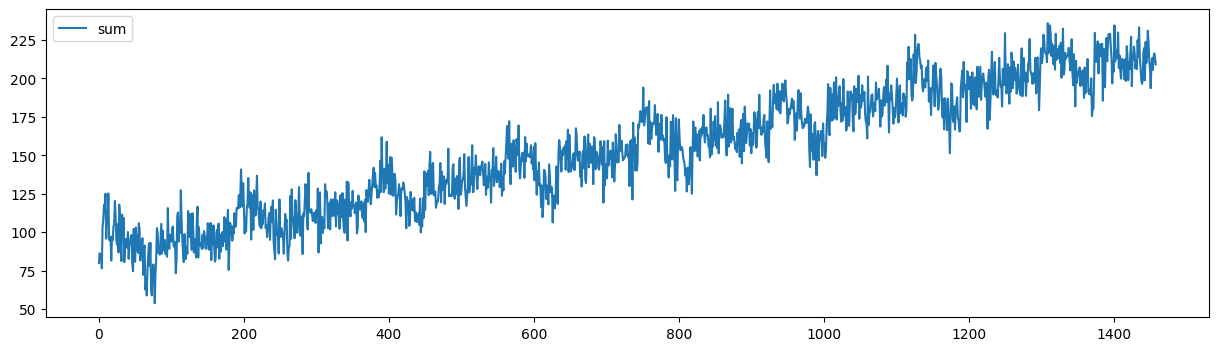

In [5]:
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['trend_data'], label ='trend')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['season_data'], label ='season')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['noise_data'], label = 'noise')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['actual'], label ='trend+season')
plt.legend()
plt.show()
plt.figure(figsize=(15,4))
plt.plot(df_fulldata['y'], label='sum')
plt.legend()
plt.show()

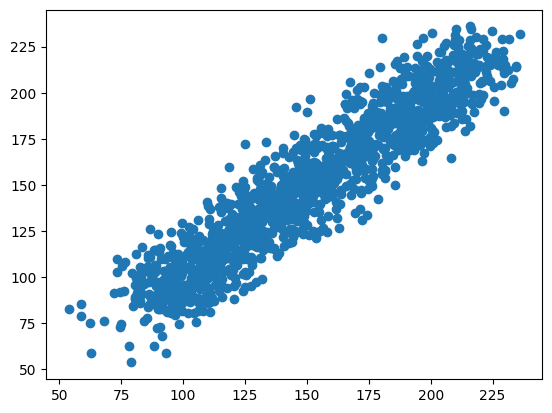

In [6]:
# Correlation
plt.scatter(df_fulldata['lag_0'],df_fulldata['y2'], label ='trend')

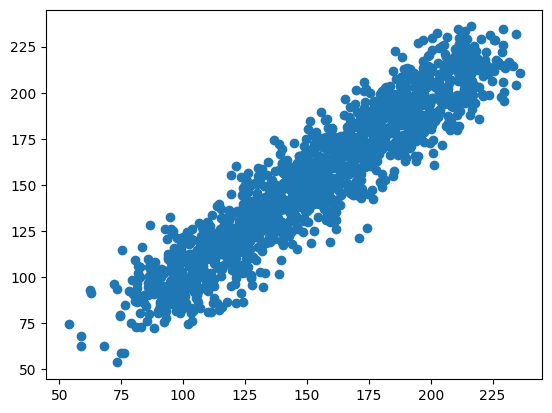

In [7]:
# Colinearity
plt.scatter(df_fulldata['lag_0'],df_fulldata['lag_1'], label ='trend')

# Moving average

## Y1

In [8]:
print(f"MAE Actual y1 : {MAE(df_fulldata['y1'], df_fulldata['actual_y1'])}")
print(f"MAE Actual y1 : {W_SMAPE(df_fulldata['y1'], df_fulldata['actual_y1'])}")

print("---- Error by Moving Average ----")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    mae_noise = MAE(df_fulldata['y1'], df_fulldata[f'ma_{i}'])
    mae_no_noise = MAE(df_fulldata['actual_y1'], df_fulldata[f'ma_{i}'])
    smape_noise = W_SMAPE(df_fulldata['y1'], df_fulldata[f'ma_{i}'])
    smape_no_noise = W_SMAPE(df_fulldata['actual_y1'], df_fulldata[f'ma_{i}'])
    print(f"ma_{i:<3} : {mae_noise:>5.2f} {smape_noise:>5.2f}% |{mae_no_noise:>5.2f} {smape_no_noise:>5.2f}%")
# Adding Noise to MA
print("---- Error by Moving Average + Noise ----")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    result = df_fulldata[f'ma_{i}'] + df_fulldata[f'diff_ma_{i}']
    mae_noise = MAE(df_fulldata['y1'], result)
    mae_no_noise = MAE(df_fulldata['actual_y1'], result)
    smape_noise = W_SMAPE(df_fulldata['y1'], result)
    smape_no_noise = W_SMAPE(df_fulldata['actual_y1'], result)
    print(f"ma_{i:<3} : {mae_noise:>5.2f} {smape_noise:>5.2f}% |{mae_no_noise:>5.2f} {smape_no_noise:>5.2f}%")

MAE Actual y1 : 7.98
MAE Actual y1 : 2.82
---- Error by Moving Average ----
ma_2   :  9.91  3.49% | 5.97  2.11%
ma_4   :  9.22  3.25% | 4.58  1.62%
ma_6   :  9.07  3.20% | 4.10  1.45%
ma_8   :  9.10  3.21% | 3.95  1.40%
ma_10  :  9.08  3.21% | 3.96  1.40%
ma_12  :  9.11  3.21% | 4.07  1.44%
ma_14  :  9.20  3.24% | 4.22  1.50%
ma_30  :  9.99  3.52% | 5.86  2.11%
ma_60  : 10.85  3.82% | 7.20  2.61%
ma_180 : 12.23  4.35% | 9.23  3.36%
ma_365 : 17.80  6.51% |16.14  6.02%
---- Error by Moving Average + Noise ----
ma_2   : 10.10  3.56% | 6.24  2.20%
ma_4   :  9.31  3.29% | 4.75  1.68%
ma_6   :  9.12  3.22% | 4.21  1.49%
ma_8   :  9.10  3.21% | 4.01  1.42%
ma_10  :  9.06  3.20% | 3.94  1.39%
ma_12  :  9.06  3.20% | 4.02  1.42%
ma_14  :  9.14  3.22% | 4.13  1.46%
ma_30  :  9.77  3.45% | 5.55  2.00%
ma_60  : 10.63  3.75% | 6.88  2.49%
ma_180 : 11.83  4.20% | 8.61  3.14%
ma_365 : 16.47  5.98% |14.64  5.43%


## Y2

In [9]:
print(f"MAE Actual y2 : {MAE(df_fulldata['y2'], df_fulldata['actual_y2'])}")
print(f"MAE Actual y2 : {W_SMAPE(df_fulldata['y2'], df_fulldata['actual_y2'])}")

print("---- Error by Moving Average ----")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    mae_noise = MAE(df_fulldata['y2'], df_fulldata[f'ma_{i}'])
    mae_no_noise = MAE(df_fulldata['actual_y2'], df_fulldata[f'ma_{i}'])
    smape_noise = W_SMAPE(df_fulldata['y2'], df_fulldata[f'ma_{i}'])
    smape_no_noise = W_SMAPE(df_fulldata['actual_y2'], df_fulldata[f'ma_{i}'])
    print(f"ma_{i:<3} : {mae_noise:>5.2f} {smape_noise:>5.2f}% |{mae_no_noise:>5.2f} {smape_no_noise:>5.2f}%")
# Adding Noise to MA
print("---- Error by Moving Average + Noise ----")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    result = df_fulldata[f'ma_{i}'] + df_fulldata[f'diff_ma_{i}']
    mae_noise = MAE(df_fulldata['y2'], result)
    mae_no_noise = MAE(df_fulldata['actual_y2'], result)
    smape_noise = W_SMAPE(df_fulldata['y2'], result)
    smape_no_noise = W_SMAPE(df_fulldata['actual_y2'], result)
    print(f"ma_{i:<3} : {mae_noise:>5.2f} {smape_noise:>5.2f}% |{mae_no_noise:>5.2f} {smape_no_noise:>5.2f}%")

MAE Actual y2 : 7.98
MAE Actual y2 : 2.82
---- Error by Moving Average ----
ma_2   :  9.90  3.51% | 6.16  2.17%
ma_4   :  9.37  3.31% | 4.81  1.70%
ma_6   :  9.29  3.28% | 4.37  1.55%
ma_8   :  9.27  3.28% | 4.25  1.51%
ma_10  :  9.25  3.27% | 4.28  1.51%
ma_12  :  9.29  3.28% | 4.38  1.55%
ma_14  :  9.37  3.30% | 4.54  1.61%
ma_30  : 10.16  3.58% | 6.12  2.20%
ma_60  : 10.94  3.86% | 7.33  2.65%
ma_180 : 12.28  4.36% | 9.30  3.39%
ma_365 : 17.88  6.53% |16.22  6.05%
---- Error by Moving Average + Noise ----
ma_2   : 10.05  3.57% | 6.43  2.27%
ma_4   :  9.44  3.34% | 4.97  1.76%
ma_6   :  9.31  3.29% | 4.46  1.58%
ma_8   :  9.28  3.28% | 4.29  1.52%
ma_10  :  9.24  3.26% | 4.25  1.50%
ma_12  :  9.25  3.26% | 4.33  1.53%
ma_14  :  9.33  3.29% | 4.45  1.58%
ma_30  :  9.98  3.52% | 5.82  2.10%
ma_60  : 10.72  3.78% | 7.03  2.54%
ma_180 : 11.90  4.22% | 8.69  3.16%
ma_365 : 16.57  6.01% |14.73  5.46%


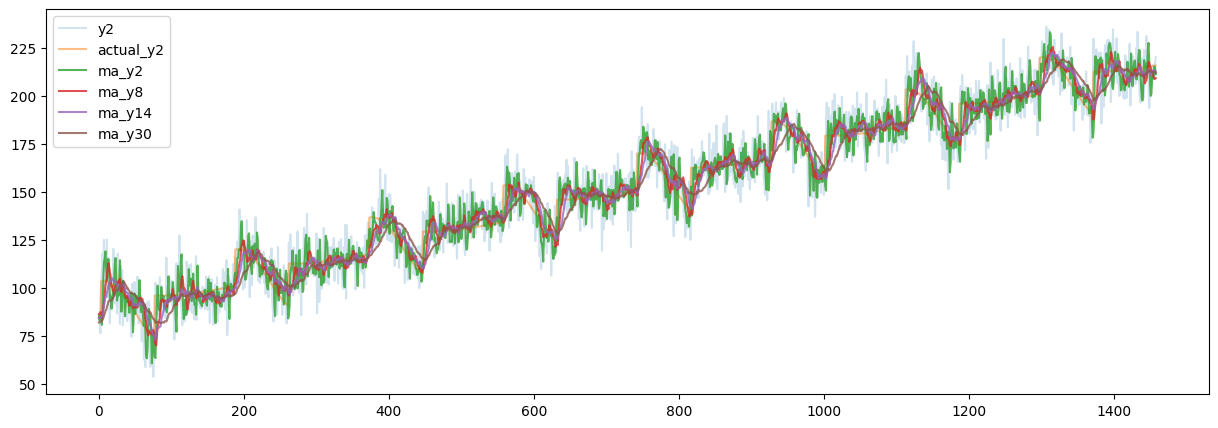

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df_fulldata['y2'], label ='y2', alpha=0.2)
plt.plot(df_fulldata['actual_y2'], label ='actual_y2', alpha=0.5)
for i in [2,8,14,30]:
    plt.plot(df_fulldata[f'ma_{i}'], label =f'ma_y{i}', alpha=0.8)
plt.legend()
plt.show()

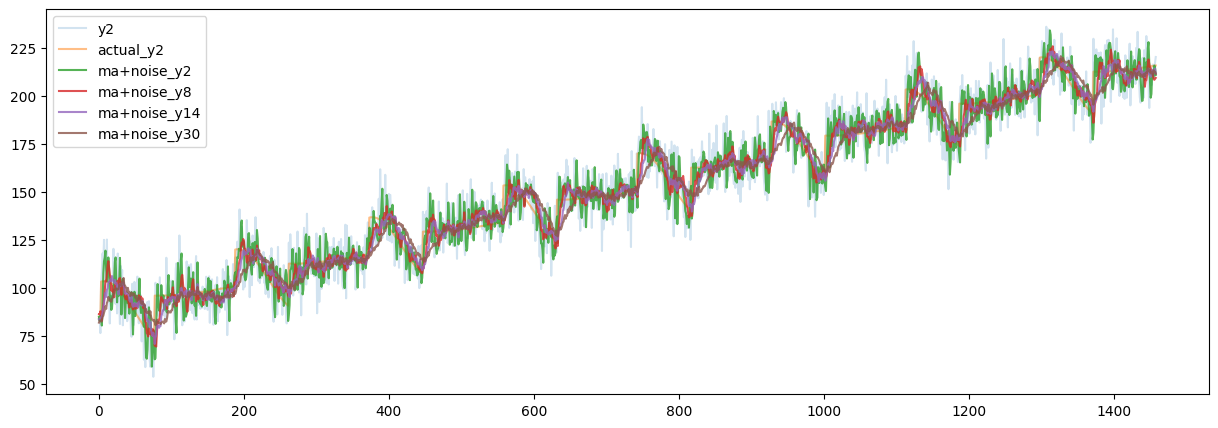

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df_fulldata['y2'], label ='y2', alpha=0.2)
plt.plot(df_fulldata['actual_y2'], label ='actual_y2', alpha=0.5)
for i in [2,8,14,30]:
    result = df_fulldata[f'ma_{i}']+ df_fulldata[f'diff_ma_{i}']
    plt.plot(result, label =f'ma+noise_y{i}', alpha=0.8)
plt.legend()
plt.show()